# Introduction 
#### Insights to home owners on how to increase their home value in Kings County.

## Exploratory Data Analysis

### Library Imports

In [45]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from statsmodels.formula.api import ols

#### Load the Kings County Housing Dataset.

In [46]:
# Load the data into a dataframe and read the first five rows
df = pd.read_csv('../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### Column/Feature Description

In [47]:
# Read the columns in the dataset
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Column Names and descriptions for Kings County Data Set
* **id** - unique identity for a house
* **date** - Date house was sold
* **price** -  Price prediction target
* **bedrooms** - Number of Bedrooms/House
* **bathrooms** - Number of bathrooms/bedrooms
* **sqft_living** - square footage of the home
* **sqft_lot** - square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [48]:
# Gets the number of rows and columns in the KC dataset
df.shape

(21597, 21)

Dataset has 21597 rows and 21 columns

Gives a description of the numeric columns in the dataset.

In [49]:
# Numeric description of the columns
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Check the data type held by each column and number of non-null values

In [50]:
# Check the data type held by each column and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Check the null values in each column

In [51]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Waterfront has 2376 null values, Year Renovated has 3842 and view column has 63 null values.

Address the null values in yr_renovated column.

In [52]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

78% (17011) of the houses in Kings County have not been renovated, I'll replace the null values with zero for this column.

In [53]:
# Replace the null values in the yr_renovated column with 0.00, which is the mode.
df['yr_renovated'] = df['yr_renovated'].fillna(0.00)
df['yr_renovated'].isna().sum()

0

Check the distribution of values in the waterfront and view columns.

In [54]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [55]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Given that a significant percentage of the values in both columns is 0, the best replacement for the null values would be the mode.

In [56]:
# Replaces null values with the column mode
df['waterfront'] = df['waterfront'].fillna(df['waterfront'].mode()[0])
df['view'] = df['view'].fillna(df['view'].mode()[0])

In [57]:
# Check for null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no null values in the dataset.

##### Convert all non-numeric data values to numeric values for analysis.

The date column contains values of type string. Before any numerical analysis, this should be converted to a numerical data type

In [58]:
# This converts the date column from string type to numerical type, which is the year the house was sold.
df['date'] = pd.to_datetime(df['date']).dt.year

In [59]:
df = df.apply(pd.to_numeric, errors='coerce')
# This check for non-numeric values in the dataset and converts them to null values
df.isna().sum()
# Check the dataset for null values after conversion.

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement    454
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
dtype: int64

c:\Users\JTG\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\JTG\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


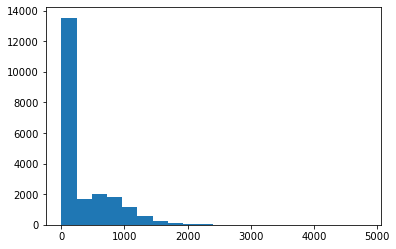

count    21143.000000
mean       291.851724
std        442.498337
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [60]:
plt.hist(df['sqft_basement'], bins=20)
# Check the data distribution in the sqft_basement column to decide on the best value to replace the null values
plt.show()
df['sqft_basement'].describe()

Since the data in the column is heavily skewed, it would be prudent to replace the null values with the mode.

In [61]:
df['sqft_basement'] = df['sqft_basement'].fillna(df['sqft_basement'].mode()[0])
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Feature Selection

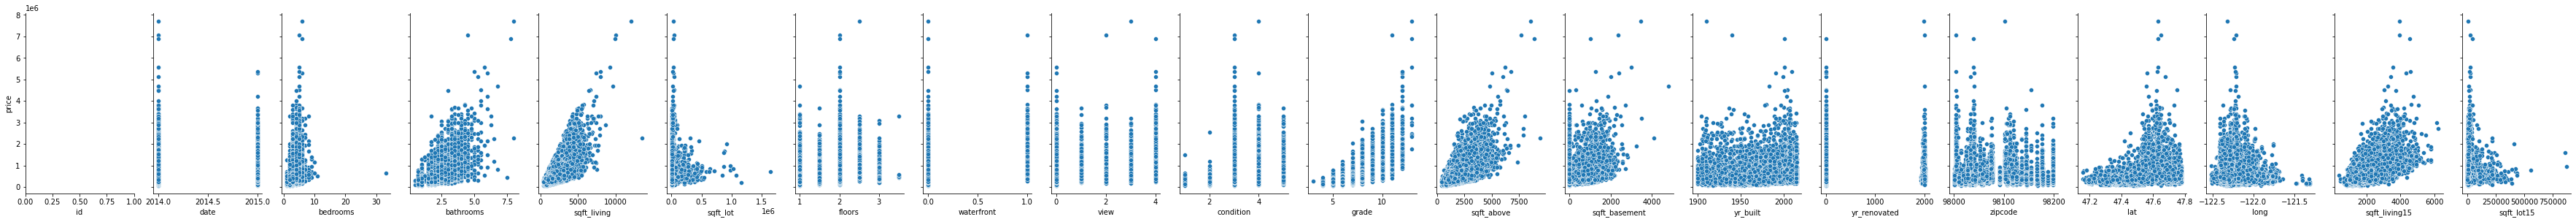

In [62]:
# 
pairplot = sns.pairplot(data=df, y_vars=['price'], x_vars=[column for column in df.columns if column!= 'price'])
pairplot.fig.set_size_inches(50,5)
plt.show()

For feature selection, we'll identify the independent variables that most affect our dependent variable, which is the price column, using a seaborn heatmap.

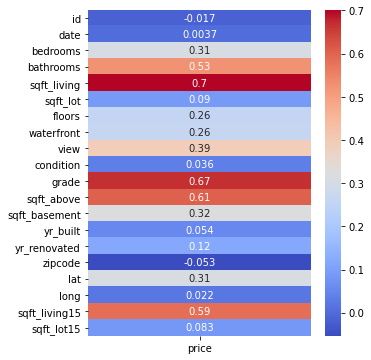

In [63]:
# Creates a seaborn heatmap that shows the correlation between the dependent variable(price) and the other independent variables
plt.figure(figsize=(5, 6))
sns.heatmap(df.corr()[[column for column in df.columns if column== 'price']].drop(['price']), annot=True, cmap='coolwarm')
plt.show()

**The most impactful features to the house price are square footage of the home(sqft_living), overall grade given to the housing unit, based on King County grading system(grade), square footage of the house apart from the basement(sqft_above) and The square footage of interior housing living space for the nearest 15 neighbors(sqft_living15)**

In [64]:
df['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [65]:
df['renovated'] = df['yr_renovated'].apply(lambda x:1 if x > 0 else 0)
df['renovated'].value_counts()

0    20853
1      744
Name: renovated, dtype: int64

##### A regression plot that shows the impact of house renovations on the dependent variable price, while controlling the other independent variables

<Figure size 432x216 with 0 Axes>

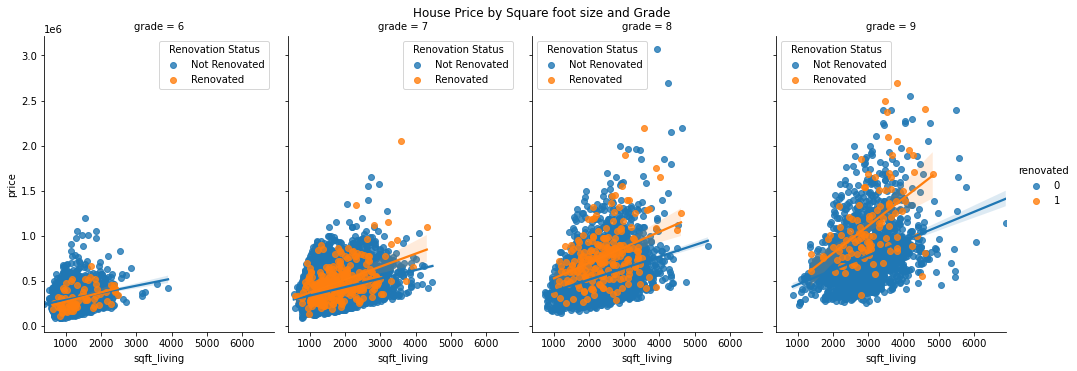

In [66]:
filtered_grade = df[df['grade'].between(6,9)]
plt.figure(figsize=(6,3))
g = sns.lmplot(data=filtered_grade, x='sqft_living', y='price', hue='renovated', aspect=0.7, col='grade')
# Customize the legends (optional)
for ax in g.axes.flat:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['Not Renovated', 'Renovated'], title='Renovation Status')

# Set plot title

g.fig.suptitle('House Price by Square foot size and Grade')
plt.subplots_adjust(top=0.9)  # Adjust the top to fit the title
plt.show()

## FEATURE CLEANING FOR MODELLING

In [67]:
feature_df = df[['sqft_above', 'sqft_living', 'sqft_living15', 'grade', 'price', 'bathrooms', 'bedrooms']]

<Figure size 864x576 with 0 Axes>

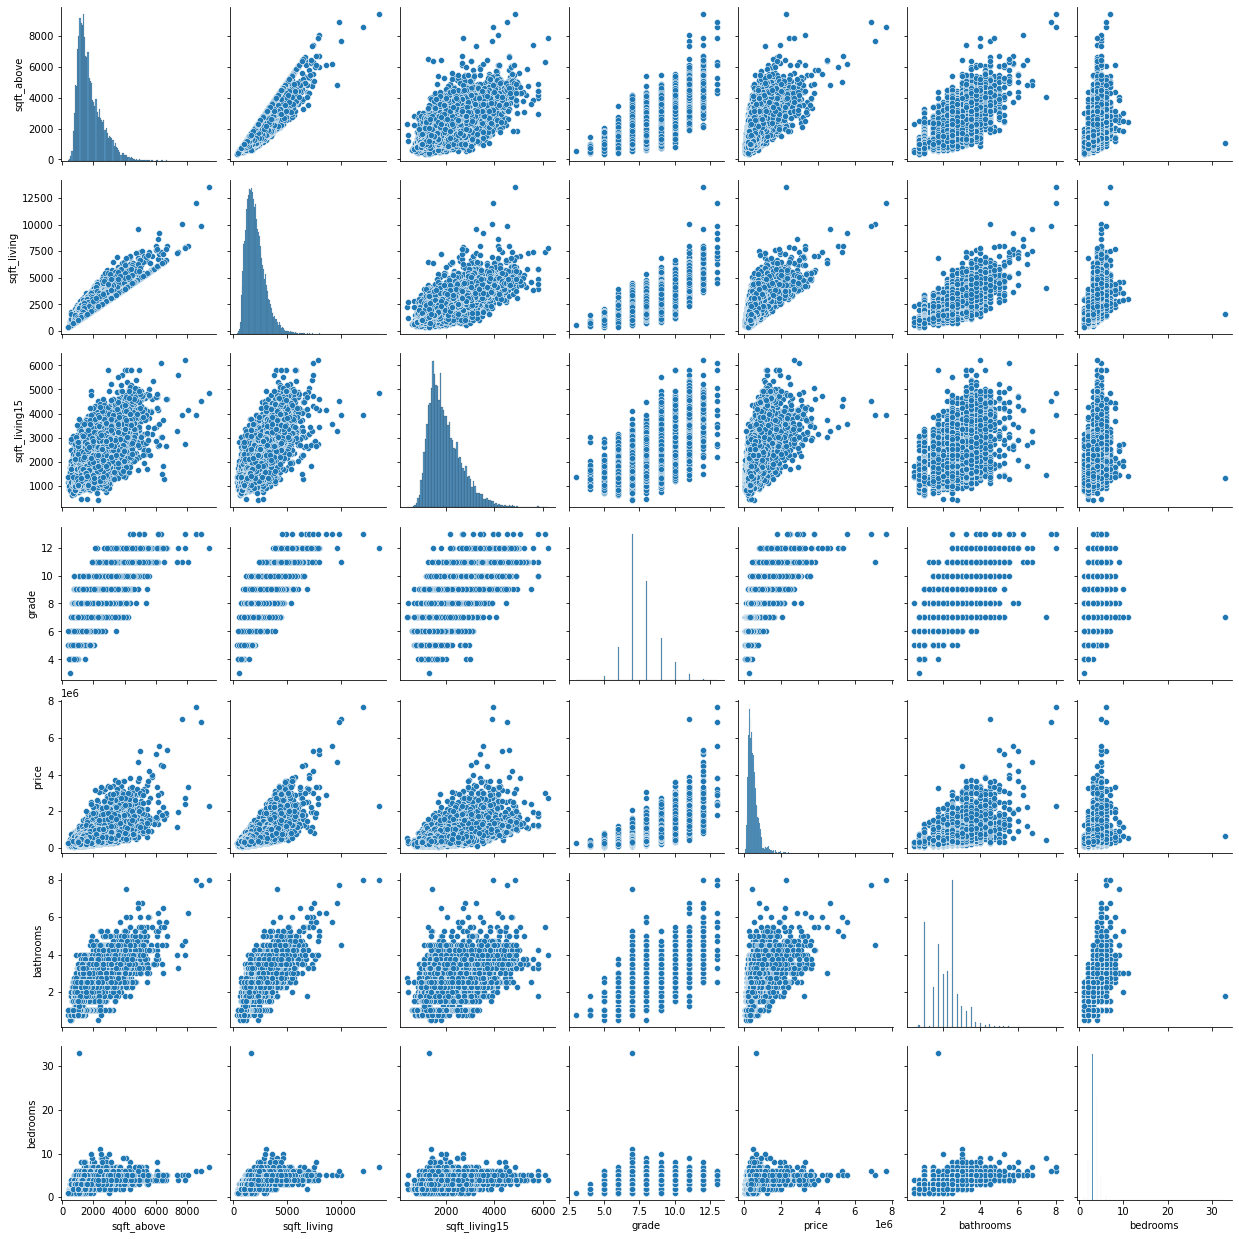

In [68]:
plt.figure(figsize=(12,8))
sns.pairplot(feature_df)
plt.show()

##### Check for outliers in the feature columns

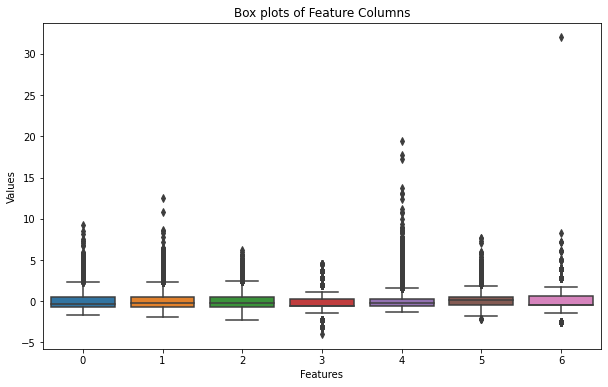

In [69]:
# scale the columns for better visualization using boxplot
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature_df)
plt.figure(figsize=(10, 6))
# boxplot for the featured columns to visualize outliers
sns.boxplot(data=scaled_features)
plt.title('Box plots of Feature Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

All the columns have outliers. Since this will impact the model negatively, the cell bell eliminates the outliers from the featured dataframe.

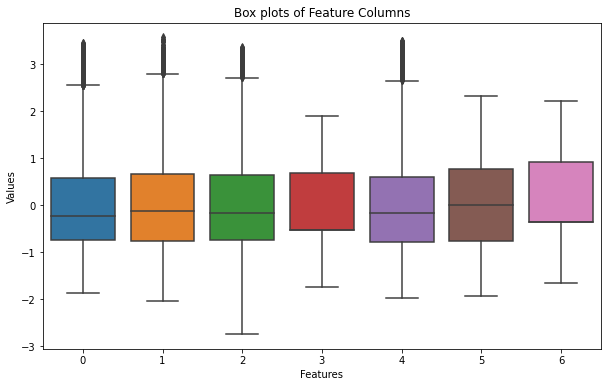

In [70]:
# Calculate IQR for feature columns
Q1 = feature_df.quantile(0.25)
Q3 = feature_df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((feature_df < lower_bound) | (feature_df > upper_bound)).any(axis=1)

# Drop indices of outliers
outlier_indices = feature_df.index[outliers]
feature_df = feature_df.drop(outlier_indices)

# Visualize features without outliers
plt.figure(figsize=(10,6))
sns.boxplot(data= scaler.fit_transform(feature_df))
plt.title('Box plots of Feature Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [71]:
feature_df.shape

(18607, 7)

##### Check for duplicates

In [72]:
# Check for duplicated rowsb
feature_df.duplicated().sum()

31

There are two duplicate rows, these are deleted in the cell below.

In [73]:
# Drop the two duplicates
feature_df.drop_duplicates(inplace=True)
feature_df.duplicated().sum()

0

Check feature colinearity using a correlation heatmap for better selection

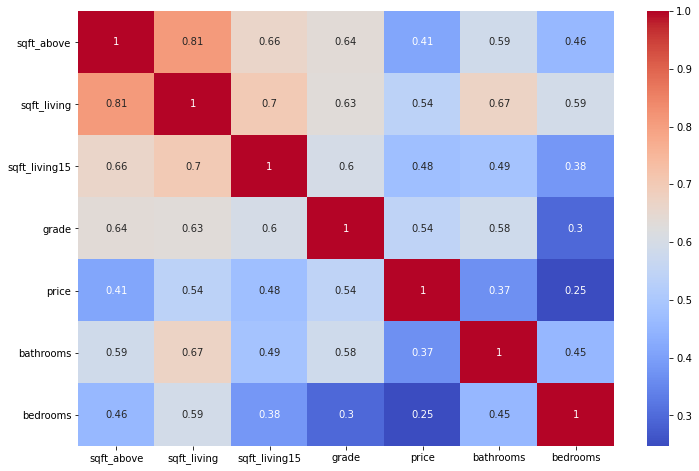

In [74]:
plt.figure(figsize=(12,8))
sns.heatmap(feature_df.corr(), annot=True, cmap='coolwarm')
plt.show()


Sqft_living and sqft_above have a high correlation score indicating a high collinearity. Drop sqft_living for the feature list for better model with low collinearity.

## Data Preparation

Assign independent variables to x and the dependent variabele, which is price, to y.

In [75]:
Y = feature_df['price']
X = feature_df[['sqft_living', 'grade']]


## Modelling

### MODEL 1 - Basic Model

In [76]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [77]:
model = LinearRegression()
# training the model
model.fit(x_train_scaled,y_train)

LinearRegression()

## Validation

In [78]:
y_pred = model.predict(x_test_scaled)
prediction_df = pd.DataFrame({"ACTUAL":y_test, "PREDICTED":y_pred})
prediction_df.head()

,ACTUAL,PREDICTED
10848,250000.0,394516.246245
19988,718000.0,629385.049537
19032,340500.0,413736.809374
11403,590000.0,634522.360184
8178,258000.0,490264.783074


In [79]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)
print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 22543238299.03687
mae 119289.86558608685
R2 0.36553703012413796


In [80]:
formula = 'price ~ grade'
#dropped a few categories, no relevant change in the data, still violates assumptions.
model = ols(formula=formula, data=feature_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     7814.
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:28:56   Log-Likelihood:            -2.4891e+05
No. Observations:               18576   AIC:                         4.978e+05
Df Residuals:                   18574   BIC:                         4.978e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.721e+05   1.06e+04    -44.565      0.000   -4.93e+05   -4.51e+05
grade       1.252e+05   1416.357     88.398      0.000    1.22e+05    1.28e+05
==============================================================================
Omnibus:                     1473.919   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1877.774
Skew:                           0.721   Prob(JB):                         0.00
Kurtosis:                       3.589   Cond. No.                         68.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
formula = 'price ~ grade'
#dropped a few categories, no relevant change in the data, still violates assumptions.
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:28:57   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### MODEL 2 - Normalized features

In [82]:
from sklearn.preprocessing import Normalizer

# Normalizer
normalizer = Normalizer()
df_normalized = pd.DataFrame(normalizer.fit_transform(feature_df), columns=feature_df.columns)

In [83]:
formula = 'price ~ grade + sqft_living'
#dropped a few categories, no relevant change in the data, still violates assumptions.
model = ols(formula=formula, data=df_normalized).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                 6.465e+04
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:28:57   Log-Likelihood:             1.8965e+05
No. Observations:               18576   AIC:                        -3.793e+05
Df Residuals:                   18573   BIC:                        -3.793e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0000   1.97e-07   5.07e+06      0.000       1.000       1.000
grade          -0.9658      0.012    -79.717      0.000      -0.990      -0.942
sqft_living    -0.0106   5.19e-05   -203.779      0.000      -0.011      -0.010
==============================================================================
Omnibus:                    17309.154   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4464390.263
Skew:                          -3.836   Prob(JB):                         0.00
Kurtosis:                      78.559   Cond. No.                     1.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
Y = df_normalized['price']
X = df_normalized[['sqft_living', 'grade']]


In [85]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [86]:
model = LinearRegression()
# training the model
model.fit(x_train_scaled,y_train)

LinearRegression()

In [87]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)
print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 224460485931.4372
mae 459942.74289774854
R2 -3.499998277619103e+20
